Copyright **`(c)`** 2023 Antonio Ferrigno `<s316467@studenti.polito.it>`  
[`https://github.com/s316467/Computational-Intelligence-23-24`](https://github.com/s316467/Computational-Intelligence-23-24)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/s316467/Computational-Intelligence-23-24/LICENSE.md) for details. 

In [15]:
from itertools import product
from random import random, randint, shuffle, seed
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

In [16]:
def make_set_covering_problem(num_points, num_sets, density):
    """Returns a sparse array where rows are sets and columns are the covered items"""
    seed(num_points*2654435761+num_sets+density)
    sets = sparse.lil_matrix((num_sets, num_points), dtype=bool)  # corrected line
    for s, p in product(range(num_sets), range(num_points)):
        if random() < density:
            sets[s, p] = True
    for p in range(num_points):
        sets[randint(0, num_sets-1), p] = True
    return sets

# Halloween Challenge

Find the best solution with the fewest calls to the fitness functions for:

* `num_points = [100, 1_000, 5_000]`
* `num_sets = num_points`
* `density = [.3, .7]` 

num_points: 100, density: 0.3, solution size: 6, fitness: 94


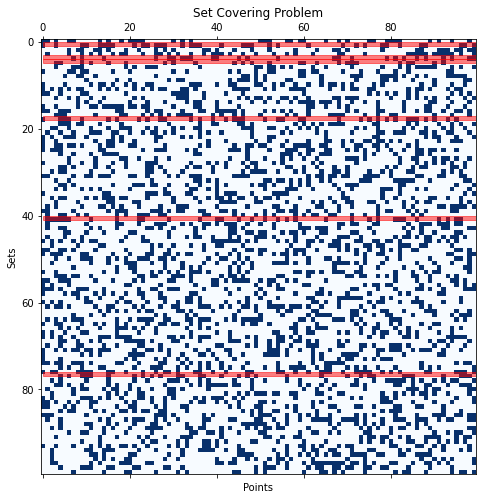

num_points: 100, density: 0.7, solution size: 3, fitness: 97


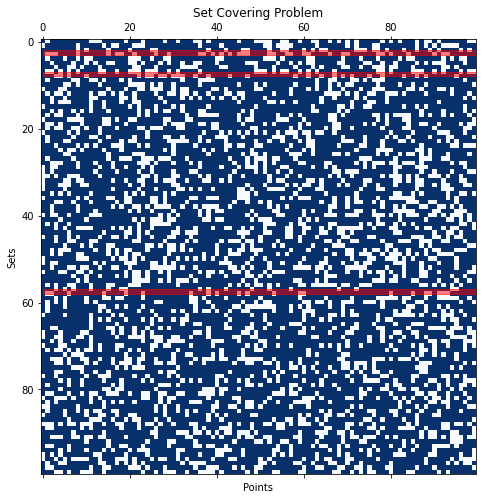

num_points: 1000, density: 0.3, solution size: 10, fitness: 990


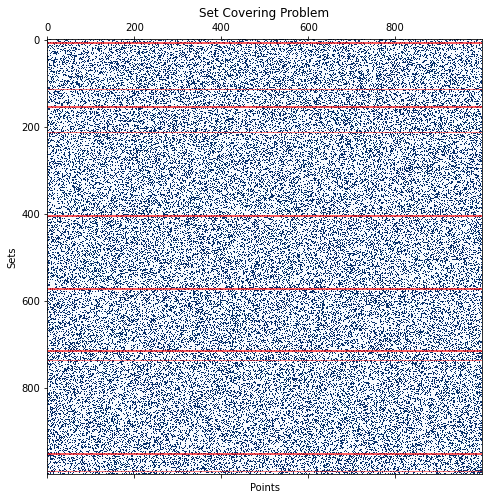

num_points: 1000, density: 0.7, solution size: 4, fitness: 996


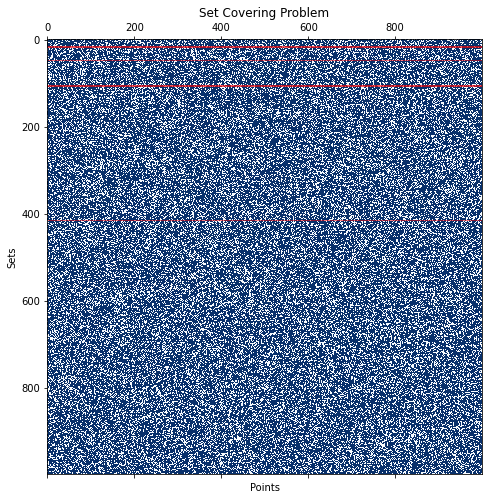

num_points: 5000, density: 0.3, solution size: 13, fitness: 4987


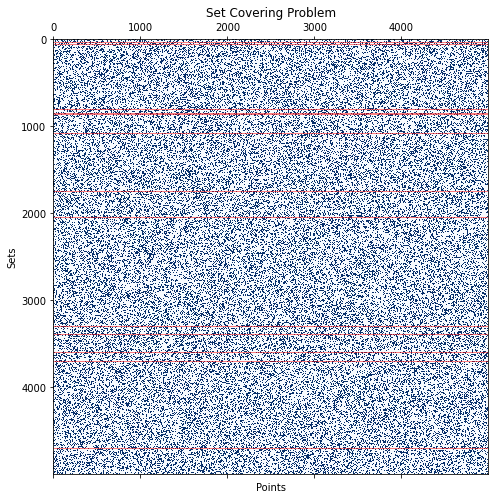

num_points: 5000, density: 0.7, solution size: 5, fitness: 4995


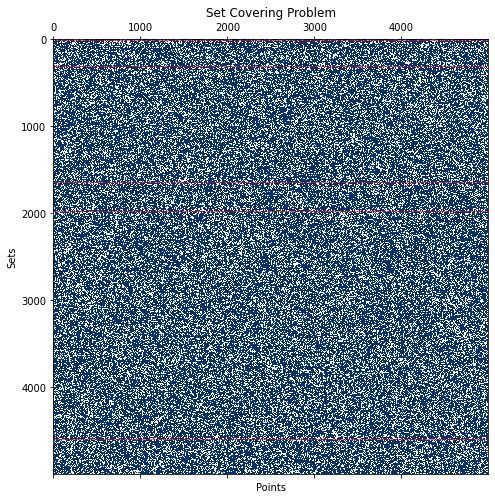

In [17]:
def fitness(solution, sets, num_points):
    covered_points = set()
    for i in solution:
        covered_points |= set(np.nonzero(sets[i, :])[1])
    return len(covered_points) - len(solution)

def greedy_algorithm(sets, num_points):
    covered_points = set()
    selected_sets = set()
    while len(covered_points) < num_points:
        best_set = max((i for i in range(sets.shape[0]) if i not in selected_sets),
                       key=lambda i: len(set(np.nonzero(sets[i, :])[1]) - covered_points))
        covered_points |= set(np.nonzero(sets[best_set, :])[1])
        selected_sets.add(best_set)
    return selected_sets

"""
This will visualize the sets, points, and selected sets for each case. 
The selected sets are highlighted in red. 
"""
def plot_solution(sets, solution, num_points):
    fig, ax = plt.subplots(figsize=(10, 8))
    cmap = plt.cm.Blues
    cax = ax.matshow(sets.todense(), cmap=cmap)
    for i in solution:
        ax.add_patch(plt.Rectangle((0, i), num_points, 1, fill=True, color='red', alpha=0.5))
    plt.xlabel('Points')
    plt.ylabel('Sets')
    plt.title('Set Covering Problem')
    plt.show()
    
# Parameters
num_points_list = [100, 1_000, 5_000]
density_list = [0.3, 0.7]

for num_points in num_points_list:
    for density in density_list:
        sets = make_set_covering_problem(num_points, num_points, density)
        solution = greedy_algorithm(sets, num_points)
        fitness_value = fitness(solution, sets, num_points)
        print(f"num_points: {num_points}, density: {density}, solution size: {len(solution)}, fitness: {fitness_value}")
        plot_solution(sets, solution, num_points)
